In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Packages

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import urllib
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet201

##Loading and Freezing the params of VGG16

In [4]:
img_rows = 100
img_cols = 100

In [5]:
VGG = VGG16(weights = "imagenet",
           include_top = False,
           input_shape = (img_rows, img_cols, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
for layer in VGG.layers:
    layer.trainable = False

## Adding a first trainable top model



In [8]:
def new_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(512, activation = "relu")(top_model)
    top_model = Dense(512, activation = "relu")(top_model)
    top_model = Dense(256, activation = "relu")(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    
    return top_model

In [8]:
model_top = new_model(VGG, 20)

In [9]:
final_model = Model(inputs = VGG.input, outputs = model_top)

In [10]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [11]:
final_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

##Defining different models

In [77]:
def new_model_2(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(512, activation = "relu")(top_model)
    top_model = Dense(256, activation = "relu")(top_model)
    top_model = Dense(128, activation = "relu")(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    
    return top_model

In [78]:
VGG_2 = VGG16(weights = "imagenet",
           include_top = False,
           input_shape = (img_rows, img_cols, 3))

In [79]:
for layer in VGG_2.layers[:15]:
    layer.trainable = False

In [80]:
model_top = new_model(VGG_2, 20)

In [81]:
final_model_2 = Model(inputs = VGG_2.input, outputs = model_top)

In [82]:
final_model_2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [83]:
final_model_2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

##Other Models

In [5]:
DenseNet = DenseNet201(weights = "imagenet",
           include_top = False,
           input_shape = (img_rows, img_cols, 3))

74842112/74836368 [==============================] - 0s 0us/step


In [6]:
for layer in DenseNet.layers[:100]:
    layer.trainable = False

In [9]:
model_top = new_model(DenseNet, 20)

In [10]:
final_model_3 = Model(inputs = DenseNet.input, outputs = model_top)

In [11]:
final_model_3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [12]:
final_model_3.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

##Loading the training and validation data

In [13]:
directory = "/content/drive/My Drive/destination_color"

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
img_rows = 100
img_cols = 100

In [16]:
data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest",
    validation_split = 0.2
    )

In [17]:
batch_size = 32

In [18]:
loaded_train_data = data_generator.flow_from_directory(
    directory,
    target_size = (img_rows,img_cols),
    batch_size = batch_size,
    class_mode = "categorical",
    subset='training'
    )

Found 1600 images belonging to 20 classes.


In [19]:
loaded_val_data = data_generator.flow_from_directory(
    directory,
    target_size = (img_rows,img_cols),
    batch_size = batch_size,
    class_mode = "categorical",
    subset='validation'
    )

Found 400 images belonging to 20 classes.


{'Aaron Judge': 0,
 'Aaron Paul': 1,
 'Aaron Taylor-Johnson': 2,
 'Abigail Breslin': 3,
 'Adam Sandler': 4,
 'Adele': 5,
 'Adriana Barraza': 6,
 'Adriana Lima': 7,
 'Adrianne Palicki': 8,
 'Adrien Brody': 9,
 'Akemi Darenogare': 10,
 'Al Pacino': 11,
 'Al Roker': 12,
 'Alan Alda': 13,
 'Alan Arkin': 14,
 'Alan Rickman': 15,
 'Albert Brooks': 16,
 'Albert Finney': 17,
 'Alec Baldwin': 18,
 'Alexander Skarsgard': 19}

##Set callbacks and train the model

In [20]:
LRreducer = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

In [21]:
EarlyStopper = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

In [23]:
TensorBoard = keras.callbacks.TensorBoard(log_dir="log/{}".format(final_model_3), histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=True, update_freq='epoch')

In [22]:
history = final_model.fit(loaded_train_data,
                    steps_per_epoch=1600/batch_size,
                    epochs=40,
                    callbacks = [LRreducer, EarlyStopper, TensorBoard],
                    validation_data = loaded_val_data,
                    validation_steps = 400/batch_size
                          )

Epoch 1/40
50/50 [==============================] - 748s 14s/step - loss: 3.0296 - accuracy: 0.0619 - val_loss: 2.8106 - val_accuracy: 0.1075
Epoch 2/40
50/50 [==============================] - 7s 150ms/step - loss: 2.7504 - accuracy: 0.1411 - val_loss: 2.5280 - val_accuracy: 0.2075
Epoch 3/40
50/50 [==============================] - 8s 152ms/step - loss: 2.5833 - accuracy: 0.1989 - val_loss: 2.3463 - val_accuracy: 0.2425
Epoch 4/40
50/50 [==============================] - 8s 152ms/step - loss: 2.3608 - accuracy: 0.2692 - val_loss: 2.2910 - val_accuracy: 0.3200
Epoch 5/40
50/50 [==============================] - 8s 152ms/step - loss: 2.3307 - accuracy: 0.2730 - val_loss: 2.1335 - val_accuracy: 0.3550
Epoch 6/40
50/50 [==============================] - 8s 152ms/step - loss: 2.1769 - accuracy: 0.3308 - val_loss: 2.1467 - val_accuracy: 0.3700
Epoch 7/40
50/50 [==============================] - 8s 155ms/step - loss: 2.0982 - accuracy: 0.3599 - val_loss: 2.1065 - val_accuracy: 0.3200
Epoch 

In [72]:
loaded_train_data.class_indices

{'Aaron Judge': 0,
 'Aaron Paul': 1,
 'Aaron Taylor-Johnson': 2,
 'Abigail Breslin': 3,
 'Adam Sandler': 4,
 'Adele': 5,
 'Adriana Barraza': 6,
 'Adriana Lima': 7,
 'Adrianne Palicki': 8,
 'Adrien Brody': 9,
 'Akemi Darenogare': 10,
 'Al Pacino': 11,
 'Al Roker': 12,
 'Alan Alda': 13,
 'Alan Arkin': 14,
 'Alan Rickman': 15,
 'Albert Brooks': 16,
 'Albert Finney': 17,
 'Alec Baldwin': 18,
 'Alexander Skarsgard': 19}

##Training other models

In [85]:
history_2 = final_model_2.fit(loaded_train_data,
                    steps_per_epoch=1600/batch_size,
                    epochs=100,
                    callbacks = [LRreducer, EarlyStopper, TensorBoard],
                    validation_data = loaded_val_data,
                    validation_steps = 400/batch_size
                          )

Epoch 1/100
50/50 [==============================] - 8s 160ms/step - loss: 2.9963 - accuracy: 0.0500 - val_loss: 2.9958 - val_accuracy: 0.0500
Epoch 2/100
50/50 [==============================] - 8s 153ms/step - loss: 2.9735 - accuracy: 0.0581 - val_loss: 2.9438 - val_accuracy: 0.0925
Epoch 3/100
50/50 [==============================] - 8s 153ms/step - loss: 2.8497 - accuracy: 0.0875 - val_loss: 2.6929 - val_accuracy: 0.1050
Epoch 4/100
50/50 [==============================] - 8s 153ms/step - loss: 2.6225 - accuracy: 0.1294 - val_loss: 2.4339 - val_accuracy: 0.1975
Epoch 5/100
50/50 [==============================] - 8s 152ms/step - loss: 2.4335 - accuracy: 0.1825 - val_loss: 2.3267 - val_accuracy: 0.2425
Epoch 6/100
50/50 [==============================] - 8s 154ms/step - loss: 2.2537 - accuracy: 0.2294 - val_loss: 2.0682 - val_accuracy: 0.3250
Epoch 7/100
50/50 [==============================] - 8s 154ms/step - loss: 2.0725 - accuracy: 0.2937 - val_loss: 1.8683 - val_accuracy: 0.3575

In [24]:
history_3 = final_model_3.fit(loaded_train_data,
                    steps_per_epoch=1600/batch_size,
                    epochs=100,
                    callbacks = [LRreducer, EarlyStopper, TensorBoard],
                    validation_data = loaded_val_data,
                    validation_steps = 400/batch_size
                          )

Epoch 1/100
50/50 [==============================] - 830s 16s/step - loss: 2.8445 - accuracy: 0.1413 - val_loss: 11.4670 - val_accuracy: 0.1900
Epoch 2/100
50/50 [==============================] - 9s 189ms/step - loss: 1.9249 - accuracy: 0.4556 - val_loss: 8.1663 - val_accuracy: 0.2900
Epoch 3/100
50/50 [==============================] - 10s 191ms/step - loss: 1.4641 - accuracy: 0.5739 - val_loss: 5.8869 - val_accuracy: 0.3400
Epoch 4/100
50/50 [==============================] - 10s 189ms/step - loss: 1.2013 - accuracy: 0.6709 - val_loss: 8.2662 - val_accuracy: 0.2475
Epoch 5/100
50/50 [==============================] - 10s 190ms/step - loss: 1.0874 - accuracy: 0.6869 - val_loss: 5.1683 - val_accuracy: 0.3625
Epoch 6/100
50/50 [==============================] - 9s 187ms/step - loss: 1.0000 - accuracy: 0.7121 - val_loss: 2.6418 - val_accuracy: 0.5800
Epoch 7/100
50/50 [==============================] - 9s 186ms/step - loss: 0.8668 - accuracy: 0.7296 - val_loss: 3.0600 - val_accuracy: 0.

##Plotting the History

In [26]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

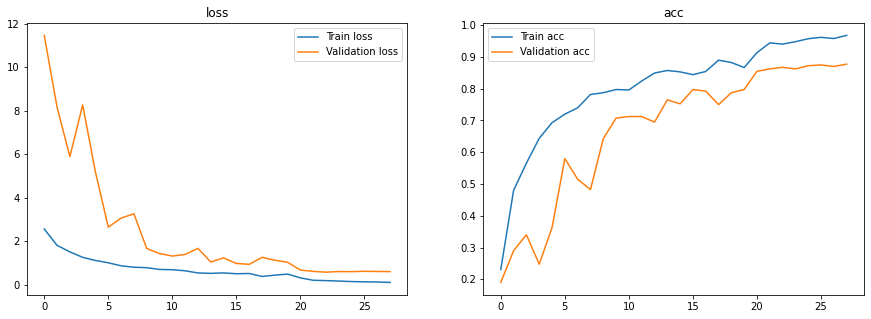

In [27]:
plot_history(history_3)

##Saving the Model

In [30]:
final_model_3.save("/content/drive/My Drive/cnn_model/model.joblib")

INFO:tensorflow:Assets written to: /content/drive/My Drive/cnn_model/model.joblib/assets


In [31]:
import joblib

In [35]:
joblib.dump(final_model_3,"/content/drive/My Drive/cnn_model/model2.joblib")

RecursionError: ignored

In [37]:
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense
# Hotfix function
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d
    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__
    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__
# Run the function
make_keras_picklable()

# Save
with open("/content/drive/My Drive/cnn_model/model2.pkl", 'wb') as f:
    pickle.dump(final_model_3, f)

## Make prediction

In [202]:
#define cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def detect_face(img):
    
    #setting the cascade classifier
    rectangle = face_cascade.detectMultiScale(img, scaleFactor = 1.1, minNeighbors = 4)
    
    #if no face is found the
    if len(rectangle) == 0:
        return None

    #setting the right coordinates
    rectangle[:,2:] += rectangle[:,:2]
    
    return rectangle[0]


def preprocess(url):
    
    #loading images
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    
    #set output image dimensions
    dim = (100,100)
        
    #calcultating coordinates of face
    coordinates = detect_face(image)
        
    #if the detect face function found a face then proceed
    if coordinates is not None:
        
        #unpacking coordinates
        x1, y1, x2, y2 = coordinates
            
        #cropping and resizing the image
        resized_image = cv2.resize(image[y1:y2,x1:x2], dim, interpolation = cv2.INTER_AREA)
        
        #normalizing
        resized_image = resized_image/255

        #adding dimension
        resized_image = resized_image[None, :]

        #saving to cropped_folder
        return resized_image
                


In [187]:
url = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Adele_2016.jpg"

In [204]:
image = preprocess(url)

In [205]:
def predict(image):

  index_to_name = {v:key for key,v in loaded_train_data.class_indices.items()}

  predicted_index = np.argmax(final_model_3.predict(image))

  predicted_name = index_to_name[predicted_index]

  return predicted_name


In [206]:
predict(image)

'Adele'

array([[[0.24705882, 0.21176471, 0.15294118],
        [0.23137255, 0.18431373, 0.12156863],
        [0.40392157, 0.34117647, 0.2627451 ],
        ...,
        [0.57647059, 0.50980392, 0.33333333],
        [0.94901961, 0.9254902 , 0.71372549],
        [0.93333333, 0.92941176, 0.71764706]],

       [[0.18823529, 0.15294118, 0.09411765],
        [0.29019608, 0.23921569, 0.18039216],
        [0.36862745, 0.30196078, 0.22352941],
        ...,
        [0.68235294, 0.62352941, 0.43529412],
        [0.96470588, 0.9372549 , 0.72156863],
        [0.94901961, 0.94509804, 0.73333333]],

       [[0.21960784, 0.18431373, 0.1372549 ],
        [0.25490196, 0.20392157, 0.14509804],
        [0.36470588, 0.29411765, 0.21176471],
        ...,
        [0.78823529, 0.71764706, 0.53333333],
        [0.95294118, 0.92156863, 0.70588235],
        [0.94117647, 0.92941176, 0.71764706]],

       ...,

       [[0.11764706, 0.12156863, 0.08235294],
        [0.10980392, 0.11372549, 0.08235294],
        [0.09411765, 0

5

array([[3.5757007e-06, 1.2538490e-04, 5.2084989e-04, 5.1032001e-04,
        9.5173906e-05, 9.7471976e-01, 2.0054279e-02, 2.1311958e-04,
        7.5161632e-05, 1.8101742e-05, 2.3598928e-05, 1.8093509e-05,
        1.3038314e-04, 1.4535752e-03, 2.4644454e-04, 2.7728674e-06,
        2.0736863e-06, 1.0321649e-03, 1.5232092e-07, 7.5499609e-04]],
      dtype=float32)

In [88]:
images_batch = loaded_train_data[0][0]

In [168]:
labels_batch = loaded_train_data[0][1]


In [193]:
index_to_name = {v:key for key,v in loaded_train_data.class_indices.items()}

In [200]:
predicted_index = np.argmax(final_model_3.predict(image))

predicted_name = index_to_name[predicted_index]

In [201]:
predicted_name

'Adele'

In [176]:
images_batch[4]

array([[[0.7673304 , 0.70458525, 0.6457617 ],
        [0.79057693, 0.73555803, 0.6741591 ],
        [0.8101358 , 0.7591554 , 0.6964103 ],
        ...,
        [0.12941177, 0.10196079, 0.0633252 ],
        [0.12941177, 0.10196079, 0.06446292],
        [0.12941177, 0.10196079, 0.06560065]],

       [[0.7650549 , 0.7023098 , 0.64348626],
        [0.7865697 , 0.7298443 , 0.66901416],
        [0.8045323 , 0.7535519 , 0.69080675],
        ...,
        [0.12941177, 0.10196079, 0.07058824],
        [0.12941177, 0.10196079, 0.07058824],
        [0.12941177, 0.10196079, 0.07058824]],

       [[0.7728796 , 0.7101345 , 0.651311  ],
        [0.7846221 , 0.72619003, 0.66592884],
        [0.7981505 , 0.7471701 , 0.684425  ],
        ...,
        [0.12941177, 0.10196079, 0.07058824],
        [0.12941177, 0.10196079, 0.07058824],
        [0.12941177, 0.10196079, 0.07058824]],

       ...,

       [[0.3104342 , 0.2712185 , 0.2320028 ],
        [0.22166374, 0.18244804, 0.14323236],
        [0.17077668, 0